<h1>Convolutions and Blurring</h1>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('toro.jpg')


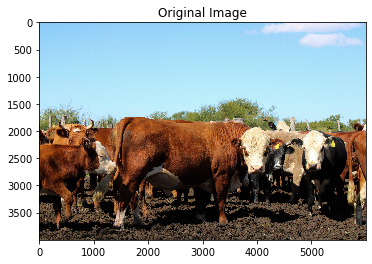

In [2]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.show()

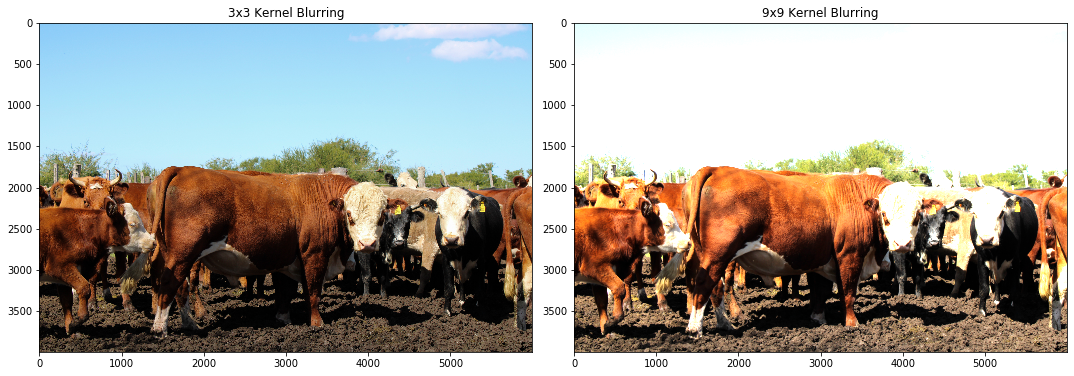

In [6]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
# Creando kernel 3 x 3 
kernel_3x3 = np.ones((3, 3), np.float32) / 9
# Utilizamos cv2.fitler2D para convolve(convolucionar?) el kernal con la imagen
blurred = cv2.filter2D(image, -1, kernel_3x3)
axs[0].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axs[0].set_title('3x3 Kernel Blurring')

# Creando kernel 9 x 9 
kernel_9x9 = np.ones((9, 9), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_9x9)
axs[1].imshow(cv2.cvtColor(blurred2, cv2.COLOR_BGR2RGB))
axs[1].set_title('9x9 Kernel Blurring')

plt.show()



<h2>Otros metodos de desenfoque de OpenCV</h2>

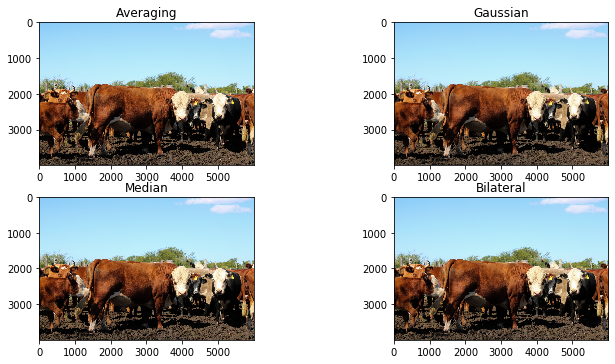

In [9]:
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()


# Toma los pixels debajo de la box y remplza el elemento central
# El tamaño de la box tiene que ser impar y positivo 
blur = cv2.blur(image, (3,3))
axs[0][0].imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Averaging')
cv2.imwrite('Average Blue.png', blur)

# Gaussian kernel
Gaussian = cv2.GaussianBlur(image, (7,7), 0)
axs[0][1].imshow(cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Gaussian')
cv2.imwrite('Gaussian Blurring.png', Gaussian)

# Toma la mediana de todos los pixels bajo el area kernel y el elemento central es remplazado por la media del valor
median = cv2.medianBlur(image, 5)
axs[1][0].imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
axs[1][0].set_title('Median')
cv2.imwrite('Median Blurring.png', median)

# El desenfoque bilateral es efectivo para reducir el ruido manteniendo los bordes claros.
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
axs[1][1].imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
axs[1][1].set_title('Bilateral')
cv2.imwrite('Bilateral Blurring.png', bilateral)

plt.show()

<h2>Image De-noising - Non-Local Means Denoising</h2>

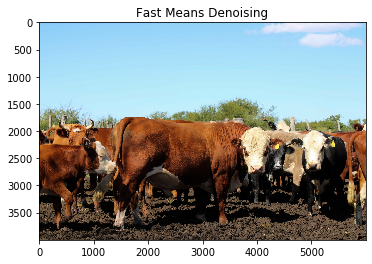

In [10]:
# Los parametros despues de None son los siguientes:
# La fuerza del filtro 'h' (5-10 es un buen rango)
# Siguiente es hForColorComponents, seteado con el mismo valor que h
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Fast Means Denoising')

plt.show()

<h3>Hay 4 variaciones de Non-Local Means Denoising:</h3>

cv2.fastNlMeansDenoising() - Trabaja con una imagen de escala de grises.
cv2.fastNlMeansDenoisingColored() - Imagen a color.
cv2.fastNlMeansDenoisingMulti() - Trabaja con secuencia de imagenes capturadas en corto período de tiempo(escala de grises)
cv2.fastNlMeansDenoisingColoredMulti() - Igual que el anterior pero para imagenes a color